# Linear Regression model with Gas Consumption Data

- we make linear regression model with Busan city's gas consumption and average tempurature from 2009-01 to 2018-05.
- we will predict Busan city's gas consumption from 2018_06 to 2019-05 by linear regression model.

### 1) import packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

### 2) load datasets
- y_train : BUSAN_gas_consumption from 2009-01 to 2018-05 (113 months)
- y_test : BUSAN_gas_consumption from 2017_06 to 2018-05 (12 months)
- https://icim.nims.re.kr/platform/question/16#summary
- temp_orig : BUSAN_average_tempurature from 2009-01 to 2018_12
- https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

In [46]:
train = pd.read_csv("test.csv", encoding="utf-8", index_col=0)
temp_orig = pd.read_csv("ta_20200329144537.csv", encoding = "cp949" , skiprows =7, usecols = ['평균기온(℃)'])

y_train = train.values[:,:]
y_test = train.values[:,-12:]

### 3) Explore datasets

In [44]:
temp_train_orig.head()

,평균기온(℃)
0,3.5
1,8.3
2,9.8
3,14.3
4,18.6


In [49]:
# temp_train : indexing tempurature from 2009-01 to 2018-05 (113 months)
# temp_test : indexing tempurature from 2017_06 to 2018-05 (12 months)

temp_train = temp_train_orig.values[:-7,:].T
temp_test = temp_train_orig.values[-31:-19,:].T

In [50]:
# explore datasets
print("Shape of y_train :" ,y_train.shape)
print("Shape of y_train :" ,y_test.shape)
print("Shape of temp_train :", temp_train.shape)
print("Shape of temp_test :", temp_test.shape)
print("Type of y_train :" , type(y_train))
print("Type of temp_train :" , type(temp_train))
print("Type of temp_test :" , type(temp_test))

Shape of y_train : (10000, 113)
Shape of y_train : (10000, 12)
Shape of temp_train : (1, 113)
Shape of temp_test : (1, 12)
Type of y_train : <class 'numpy.ndarray'>
Type of temp_train : <class 'numpy.ndarray'>
Type of temp_test : <class 'numpy.ndarray'>


### 4) Linear Regression Model

In [51]:
model = LinearRegression(fit_intercept=True)
model = model.fit(temp_train.T, y_train.T)

### 5) Result

In [52]:
# explore W & b
W = model.coef_
b = model.intercept_
b = b.reshape(10000,1)

print("W =", W)
print("b =", b)
print()
print("Shape of W :", W.shape)
print("Shape of b :", b.shape)

W = [[-3.06201993]
 [-2.32832629]
 [-3.08658326]
 ...
 [-3.03092111]
 [-1.11216643]
 [-5.91888552]]
b = [[ 84.66048907]
 [ 74.10395583]
 [ 83.46083752]
 ...
 [ 75.99082708]
 [ 33.03855055]
 [149.90076898]]

Shape of W : (10000, 1)
Shape of b : (10000, 1)


### 6) Visualization of an id

In [53]:
def plot(W,b,temp,y,n) : 
    # propagation
    Z = np.dot(W,temp) + b
    
    nth_temp = temp[0]
    
    # indexing n_th data
    nth_Z = Z[n-1]
    nth_y = y[n-1]
    
    # visualization
    plt.plot(nth_temp, nth_Z, color = "red")
    plt.scatter(nth_temp, nth_y, color = "blue")
#     plt.plot(nth_temp, nth_y,'o', color = "blue") # same as above
    plt.title("id = {0} (num={1})".format(78586 + n, n))
    plt.xlabel("Average temperature per month")
    plt.ylabel("Gas consumption")
    plt.show()

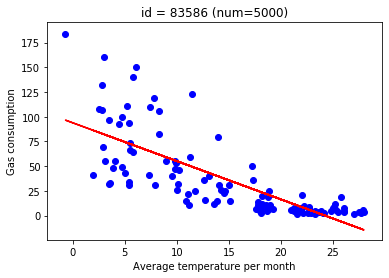

In [54]:
plot(W, b, temp_train, y_train, n = 5000)  # you can change "n"

- 'Average temperature' and 'Gas consumption' seem proportional to each other.

### 7) Predict & Check RMSE

In [57]:
Y_hat = np.dot(W,temp_test) + b

In [58]:
RMSE = mean_squared_error(y_test, Y_hat) ** 0.5
print("RMSE :" , RMSE)

RMSE : 28.551740357799776
